In [98]:
import io
import os
import requests
import zipfile
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
COLOR = 'white'
cwd = os.getcwd()
plt.rcParams['figure.figsize'] = [16, 10]



In [99]:
def get_pollution_gis_data():
    r = requests.get('https://data.london.gov.uk/download/london-atmospheric-emissions-inventory--laei--2016/20fd5087-ee4e-4037-8b3a-61271f31348a/LAEI_2016_Concentrations_Data_Excel.zip', stream=True)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(cwd + '/data/')

get_pollution_gis_data()

In [23]:
no2_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_NO2.csv')
no2_df.describe()


,x,y,conc
count,5.851915e+06,5.851915e+06,5.851915e+06
mean,5.293091e+05,1.785364e+05,3.142379e+01
std,1.481282e+04,1.290930e+04,6.921515e+00
min,5.014800e+05,1.523400e+05,2.094733e+01
25%,5.168400e+05,1.679000e+05,2.665925e+01
50%,5.292400e+05,1.789400e+05,3.005833e+01
75%,5.416800e+05,1.893600e+05,3.452922e+01
max,5.619800e+05,2.034200e+05,4.478547e+02


In [ ]:
no2_df_high = no2_df[no2_df['conc'] < 100]
no2_df_high['size'] = no2_df_high['conc'] / 10000
no2_df_high.describe()

In [ ]:
cmap = plt.cm.get_cmap('plasma')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [ ]:
def create_pollution_map(df, legend_text):
    fig, ax = plt.subplots()
    colour = [item / 255.0 for item in df['conc']]
    ax.scatter(df['x'], df['y'], c=colour, cmap=my_cmap, s=df['size'])
    norm = mcolors.Normalize(min(df['conc']), max(df['conc']))
    sm = matplotlib.cm.ScalarMappable(cmap=my_cmap, norm=norm)
    sm.set_array([])
    ax.axis('off')

    cbar = plt.colorbar(sm)
    cbar.set_label(legend_text)
    return plt.show()

In [ ]:
create_pollution_map(no2_df_high, 'NO2 per cubic metre')

In [ ]:
no_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_NOx.csv')
no_df_high = no_df[no_df['conc'] < 100]
no_df_high['size'] = no_df_high['conc'] / 10000
no_df_high.describe()

In [ ]:
create_pollution_map(no_df_high, 'NOx per cubic metre')

In [ ]:
pm10_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM10.csv')
pm10_df = pm10_df[pm10_df['conc'] < 100]
pm10_df['size'] = pm10_df['conc'] / 1000
pm10_df.head(100)

In [ ]:
create_pollution_map(pm10_df, 'something')

In [ ]:
pm10d_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM10d.csv')
pm10d_df = pm10d_df[pm10d_df['conc'] < 100]
pm10d_df['size'] = pm10d_df['conc'] / 100
pm10d_df.head()

In [ ]:
create_pollution_map(pm10d_df, 'something')

In [ ]:
pm25_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM25.csv')
pm25_df = pm25_df[pm25_df['conc'] < 100]
pm25_df['size'] = pm25_df['conc'] / 1000
pm25_df.head()

In [ ]:
create_pollution_map(pm25_df, 'something')

In [61]:
create_pollution_map(pm25_df, 'something')

C:\Users\russell.plunkett\AppData\Local\Continuum\anaconda37\envs\ucl_analytics_for_policy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,conc,size
count,5.850204e+06,5.850204e+06,5.850204e+06,5.850204e+06
mean,5.293090e+05,1.785356e+05,3.139683e+01,3.139683e-03
std,1.481475e+04,1.291101e+04,6.717020e+00,6.717020e-04
min,5.014800e+05,1.523400e+05,2.094733e+01,2.094733e-03
25%,5.168400e+05,1.679000e+05,2.665839e+01,2.665839e-03
50%,5.292400e+05,1.789200e+05,3.005601e+01,3.005601e-03
75%,5.416800e+05,1.893600e+05,3.452443e+01,3.452443e-03
max,5.619800e+05,2.034200e+05,9.999379e+01,9.999379e-03


In [102]:
cmap = plt.cm.get_cmap('plasma')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [113]:
def create_pollution_map(df, legend_text):
    fig, ax = plt.subplots()
    colour = [item / 255.0 for item in df['conc']]
    ax.scatter(df['x'], df['y'], c=colour, cmap=my_cmap, s=df['size'])
    norm = mcolors.Normalize(min(df['conc']), max(df['conc']))
    sm = matplotlib.cm.ScalarMappable(cmap=my_cmap, norm=norm)
    sm.set_array([])
    ax.axis('off')

    cbar = plt.colorbar(sm)
    cbar.set_label(legend_text)
    return plt.show()

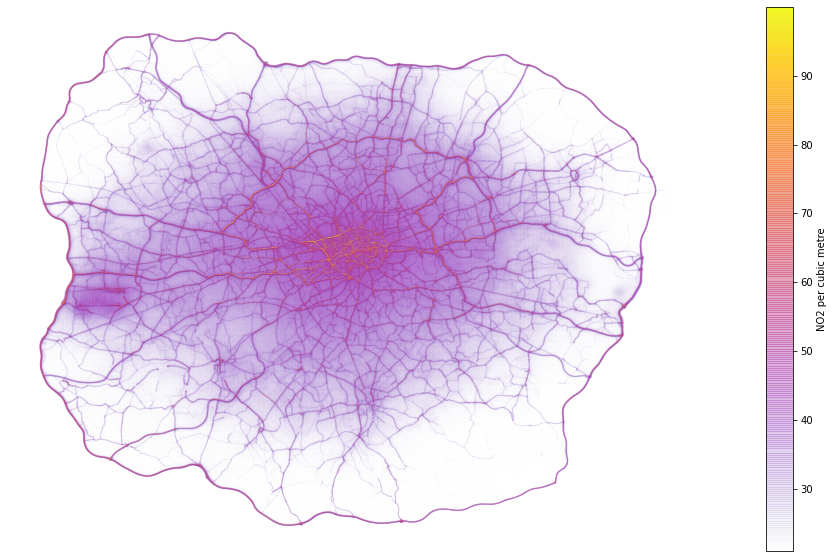

In [114]:
create_pollution_map(no2_df_high, 'NO2 per cubic metre')

In [65]:
no_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_NOx.csv')
no_df_high = no_df[no_df['conc'] < 100]
no_df_high['size'] = no_df_high['conc'] / 10000
no_df_high.describe()

C:\Users\russell.plunkett\AppData\Local\Continuum\anaconda37\envs\ucl_analytics_for_policy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y,conc,size
count,5.695064e+06,5.695064e+06,5.695064e+06,5.695064e+06
mean,5.293416e+05,1.784851e+05,5.059173e+01,5.059173e-03
std,1.485641e+04,1.297254e+04,1.344234e+01,1.344234e-03
min,5.014800e+05,1.523400e+05,2.813276e+01,2.813276e-03
25%,5.167800e+05,1.677400e+05,4.012208e+01,4.012208e-03
50%,5.292600e+05,1.787800e+05,4.788025e+01,4.788025e-03
75%,5.418200e+05,1.894600e+05,5.828274e+01,5.828274e-03
max,5.619800e+05,2.034200e+05,9.999989e+01,9.999989e-03


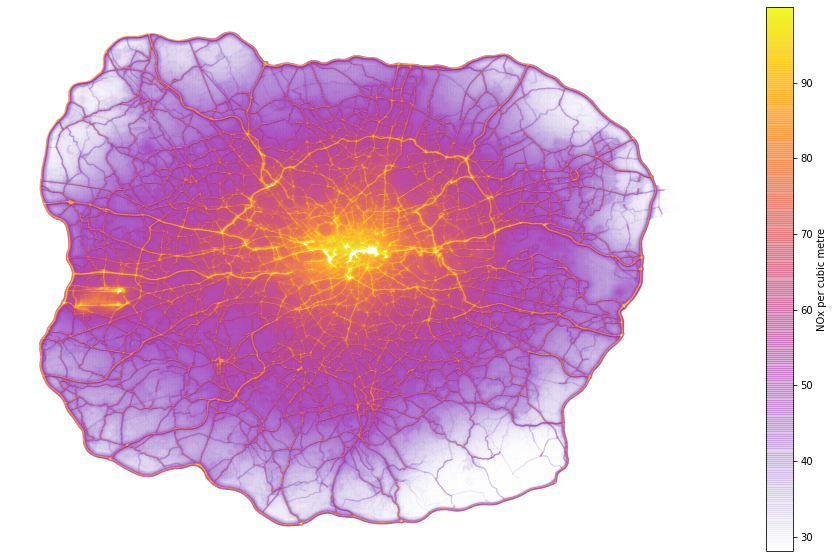

In [115]:
create_pollution_map(no_df_high, 'NOx per cubic metre')

In [75]:
pm10_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM10.csv')
pm10_df = pm10_df[pm10_df['conc'] < 100]
pm10_df['size'] = pm10_df['conc'] / 1000
pm10_df.head(100)

,x,y,conc,size
0,519080,203420,18.97395,0.018974
1,519100,203420,19.00972,0.019010
2,519120,203420,18.92083,0.018921
3,519140,203420,18.91758,0.018918
4,519160,203420,18.91737,0.018917
...,...,...,...,...
95,519180,203360,21.25213,0.021252
96,519200,203360,21.24748,0.021247
97,519220,203360,21.21442,0.021214
98,519240,203360,21.16951,0.021170


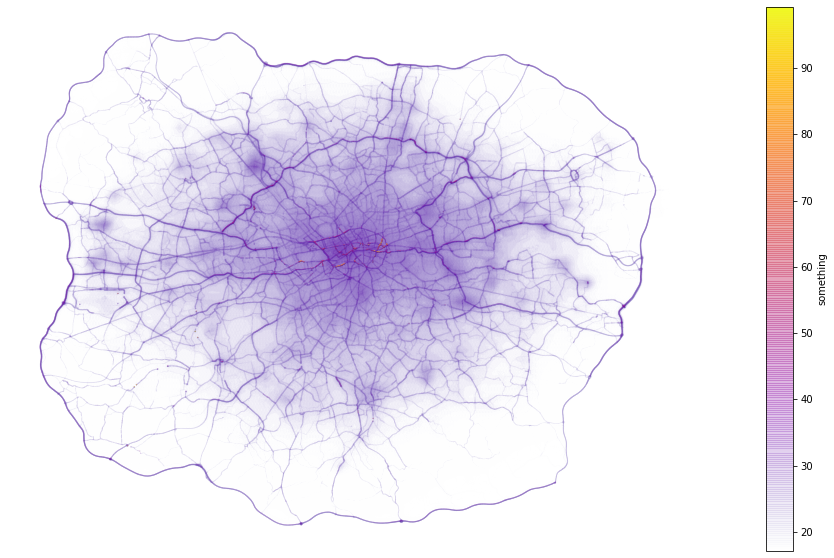

In [116]:
create_pollution_map(pm10_df, 'something')

In [78]:
pm10d_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM10d.csv')
pm10d_df = pm10d_df[pm10d_df['conc'] < 100]
pm10d_df['size'] = pm10d_df['conc'] / 100
pm10d_df.head()

,x,y,conc,size
0,519080,203420,3.517773,0.035178
1,519100,203420,3.545082,0.035451
2,519120,203420,3.477607,0.034776
3,519140,203420,3.475160,0.034752
4,519160,203420,3.475003,0.034750


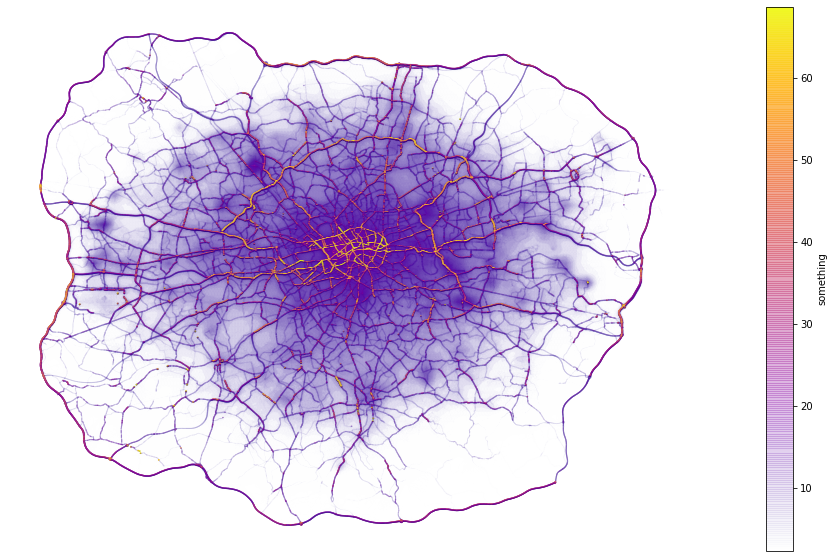

In [117]:
create_pollution_map(pm10d_df, 'something')

In [81]:
pm25_df = pd.read_csv(cwd + '/data/CSV/LAEI2016_2016_PM25.csv')
pm25_df = pm25_df[pm25_df['conc'] < 100]
pm25_df['size'] = pm25_df['conc'] / 1000
pm25_df.head()

,x,y,conc,size
0,519080,203420,11.53776,0.011538
1,519100,203420,11.55011,0.011550
2,519120,203420,11.51077,0.011511
3,519140,203420,11.50790,0.011508
4,519160,203420,11.50694,0.011507


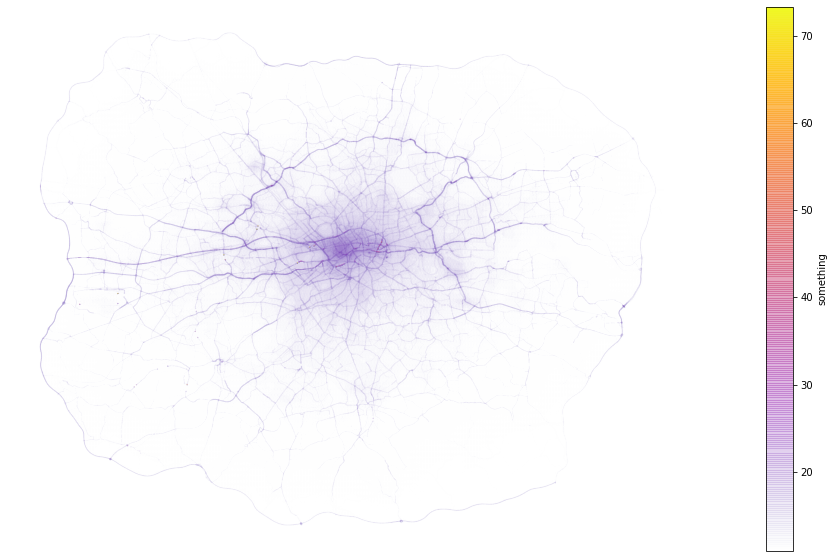

In [118]:
create_pollution_map(pm25_df, 'something')